In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and logitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [5]:
import requests
from config import weather_api_key
import time
from datetime import datetime

In [6]:
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=90d5d0f1ccb6f9a40fcbcf02a8a80631


In [7]:
#Create an endpoint URL for a city.
city_url = url +"&q=" + "Boston"
print(city_url)

https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=90d5d0f1ccb6f9a40fcbcf02a8a80631&q=Boston


In [8]:
# Makae a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":287.16,"feels_like":287.07,"temp_min":285.98,"temp_max":288.37,"pressure":1014,"humidity":94},"visibility":5504,"wind":{"speed":3.13,"deg":348,"gust":6.71},"clouds":{"all":100},"dt":1665000081,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1664966731,"sunset":1665008372},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [10]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 287.16,
  'feels_like': 287.07,
  'temp_min': 285.98,
  'temp_max': 288.37,
  'pressure': 1014,
  'humidity': 94},
 'visibility': 5504,
 'wind': {'speed': 3.13, 'deg': 348, 'gust': 6.71},
 'clouds': {'all': 100},
 'dt': 1665000081,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1664966731,
  'sunset': 1665008372},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 287.16,
  'feels_like': 287.07,
  'temp_min': 285.98,
  'temp_max': 288.37,
  'pressure': 1014,
  'humidity': 94},
 'visibility': 5504,
 'wind': {'speed': 3.13, 'deg': 348, 'gust': 6.71},
 'clouds': {'all': 100},
 'dt': 1665000081,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1664966731,
  'sunset': 1665008372},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Get the JSON data.
boston_data = city_weather.json()

In [15]:
boston_data["sys"]["country"]


'US'

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 288.37 94 100 3.13


In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-10-05 20:01:21'

In [18]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | chajul
Processing Record 9 of Set 1 | hami
Processing Record 10 of Set 1 | tawau
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 14 of Set 1 | srednekolymsk
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | ust-maya
Processing Record 18 of Set 1 | cherskiy
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | berlevag
Pro

Processing Record 36 of Set 4 | havelock
Processing Record 37 of Set 4 | anadyr
Processing Record 38 of Set 4 | hambantota
Processing Record 39 of Set 4 | yumen
Processing Record 40 of Set 4 | gouyave
Processing Record 41 of Set 4 | airai
Processing Record 42 of Set 4 | saint-louis
Processing Record 43 of Set 4 | carballo
Processing Record 44 of Set 4 | ilulissat
Processing Record 45 of Set 4 | bara
Processing Record 46 of Set 4 | yarada
Processing Record 47 of Set 4 | vestmannaeyjar
Processing Record 48 of Set 4 | santa cruz
Processing Record 49 of Set 4 | kaitangata
Processing Record 50 of Set 4 | okmulgee
Processing Record 1 of Set 5 | port augusta
Processing Record 2 of Set 5 | gizo
Processing Record 3 of Set 5 | mount isa
Processing Record 4 of Set 5 | san jeronimo
Processing Record 5 of Set 5 | narsaq
Processing Record 6 of Set 5 | north bend
Processing Record 7 of Set 5 | yar-sale
Processing Record 8 of Set 5 | zhangjiakou
Processing Record 9 of Set 5 | cidreira
Processing Recor

Processing Record 21 of Set 8 | changping
Processing Record 22 of Set 8 | talisayan
Processing Record 23 of Set 8 | boa vista
Processing Record 24 of Set 8 | taoudenni
Processing Record 25 of Set 8 | rawson
Processing Record 26 of Set 8 | grand gaube
Processing Record 27 of Set 8 | vila franca do campo
Processing Record 28 of Set 8 | podporozhye
Processing Record 29 of Set 8 | teahupoo
Processing Record 30 of Set 8 | comodoro rivadavia
Processing Record 31 of Set 8 | inirida
Processing Record 32 of Set 8 | sao filipe
Processing Record 33 of Set 8 | kununurra
Processing Record 34 of Set 8 | bairiki
Processing Record 35 of Set 8 | provideniya
Processing Record 36 of Set 8 | ambato
Processing Record 37 of Set 8 | karamea
City not found. Skipping...
Processing Record 38 of Set 8 | manaure
Processing Record 39 of Set 8 | taksimo
Processing Record 40 of Set 8 | san carlos
Processing Record 41 of Set 8 | takoradi
Processing Record 42 of Set 8 | porto santo
Processing Record 43 of Set 8 | bajo

Processing Record 5 of Set 12 | si chiang mai
Processing Record 6 of Set 12 | veraval
Processing Record 7 of Set 12 | nazare
Processing Record 8 of Set 12 | makung
City not found. Skipping...
Processing Record 9 of Set 12 | bardiyah
Processing Record 10 of Set 12 | shimoda
Processing Record 11 of Set 12 | arman
Processing Record 12 of Set 12 | phalaborwa
Processing Record 13 of Set 12 | paamiut
Processing Record 14 of Set 12 | kotelnich
Processing Record 15 of Set 12 | sechura
Processing Record 16 of Set 12 | kavieng
Processing Record 17 of Set 12 | ambilobe
Processing Record 18 of Set 12 | suraabad
Processing Record 19 of Set 12 | honggang
Processing Record 20 of Set 12 | saint-francois
Processing Record 21 of Set 12 | kuryk
Processing Record 22 of Set 12 | pahrump
Processing Record 23 of Set 12 | alekseyevsk
Processing Record 24 of Set 12 | najran
Processing Record 25 of Set 12 | shenjiamen
Processing Record 26 of Set 12 | teknaf
Processing Record 27 of Set 12 | dunmore town
Processi

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,303.31,86,19,0.45,US,2022-10-05 20:03:38
1,Albany,42.6001,-73.9662,291.42,80,98,1.69,US,2022-10-05 20:03:17
2,Port Alfred,-33.5906,26.8910,289.92,89,93,2.24,ZA,2022-10-05 19:59:28
3,Vaini,-21.2000,-175.2000,297.86,87,100,6.06,TO,2022-10-05 20:03:39
4,Qaanaaq,77.4840,-69.3632,259.25,73,50,3.45,GL,2022-10-05 20:02:20
5,Chajul,15.4853,-91.0342,298.17,59,87,3.01,GT,2022-10-05 20:03:40
6,Hami,42.8000,93.4500,284.67,46,0,2.22,CN,2022-10-05 20:03:40
7,Tawau,4.2498,117.8871,297.88,90,12,2.25,MY,2022-10-05 20:03:40
8,Punta Arenas,-53.1500,-70.9167,284.88,62,100,6.98,CL,2022-10-05 20:00:14
9,Bredasdorp,-34.5322,20.0403,283.91,90,0,2.36,ZA,2022-10-05 20:03:41


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2022-10-05 20:03:38,19.7297,-155.0900,303.31,86,19,0.45
1,Albany,US,2022-10-05 20:03:17,42.6001,-73.9662,291.42,80,98,1.69
2,Port Alfred,ZA,2022-10-05 19:59:28,-33.5906,26.8910,289.92,89,93,2.24
3,Vaini,TO,2022-10-05 20:03:39,-21.2000,-175.2000,297.86,87,100,6.06
4,Qaanaaq,GL,2022-10-05 20:02:20,77.4840,-69.3632,259.25,73,50,3.45


In [21]:
# Set the output file name
output_data_file = "cities.csv"

# Export the city_data DataFrame into a CSV file
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

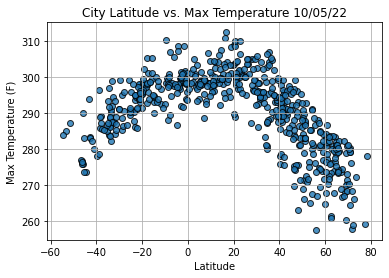

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

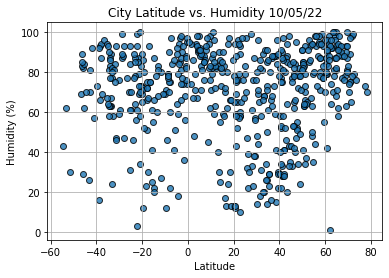

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

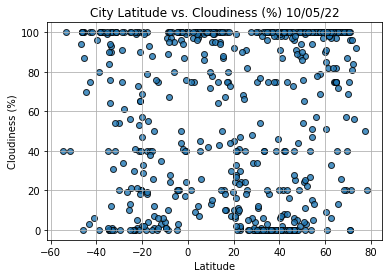

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

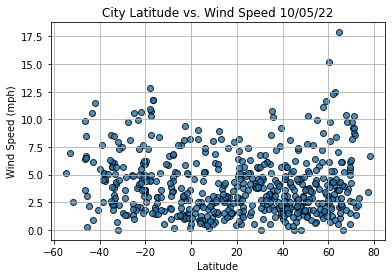

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Create a function to create perform linear regression on the weather
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

SyntaxError: unexpected EOF while parsing (<ipython-input-28-8ed55decbef5>, line 4)

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):


    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, (10,40), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel('Temp')
    plt.show()

In [32]:
index13 = city_data_df.loc[13]
index13

City                     Ust-Maya
Country                        RU
Date          2022-10-05 20:03:43
Lat                       60.4167
Lng                       134.533
Max Temp                   267.68
Humidity                       84
Cloudiness                     91
Wind Speed                   3.11
Name: 13, dtype: object

In [33]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2022-10-05 20:03:38,19.7297,-155.0900,303.31,86,19,0.45
1,Albany,US,2022-10-05 20:03:17,42.6001,-73.9662,291.42,80,98,1.69
4,Qaanaaq,GL,2022-10-05 20:02:20,77.4840,-69.3632,259.25,73,50,3.45
5,Chajul,GT,2022-10-05 20:03:40,15.4853,-91.0342,298.17,59,87,3.01
6,Hami,CN,2022-10-05 20:03:40,42.8000,93.4500,284.67,46,0,2.22


In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

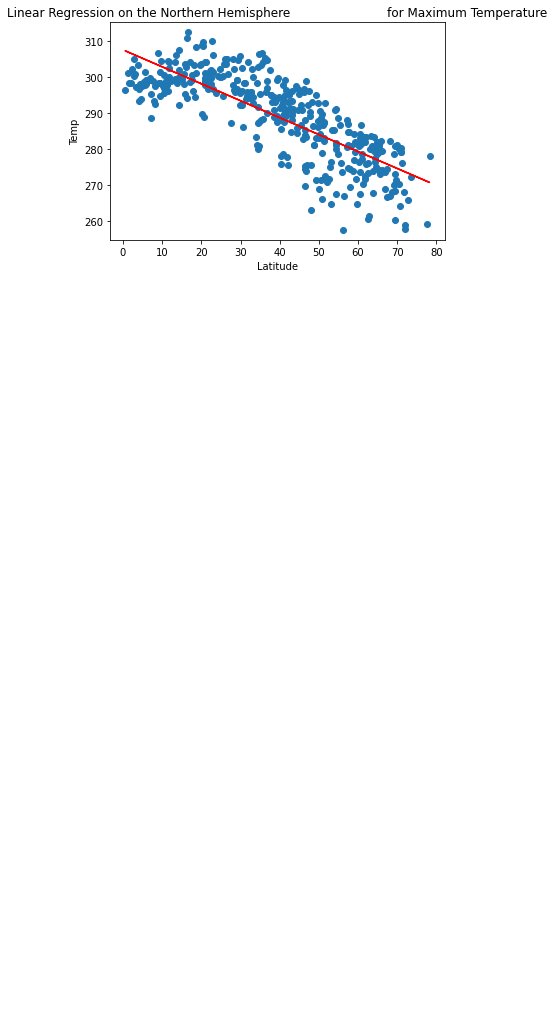

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

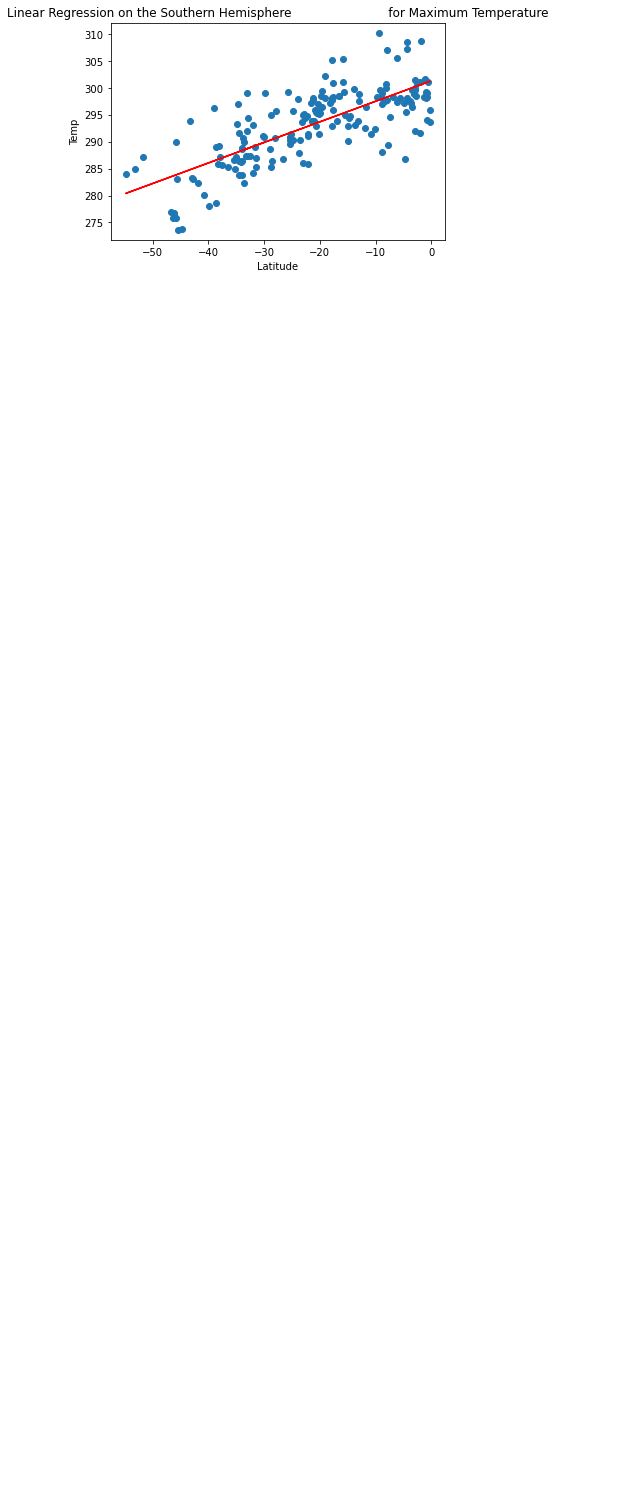

In [36]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

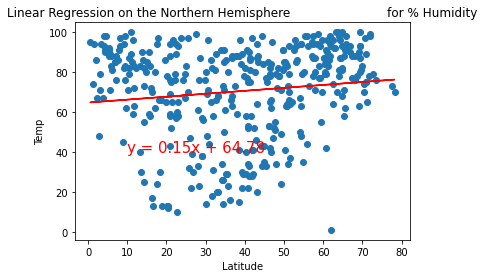

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

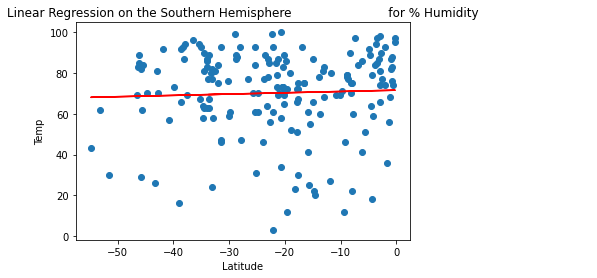

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

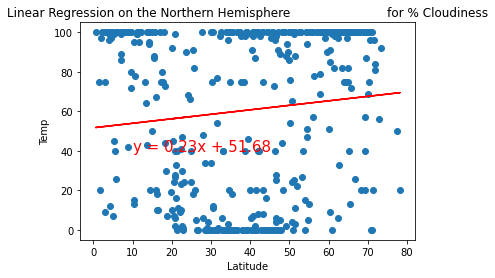

In [39]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,100))

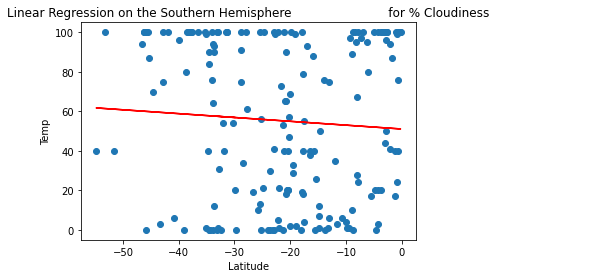

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

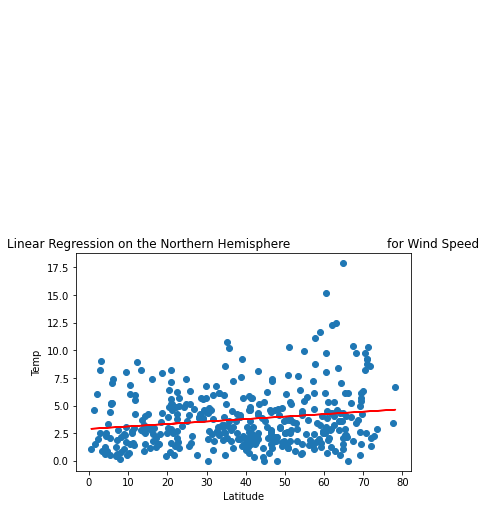

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

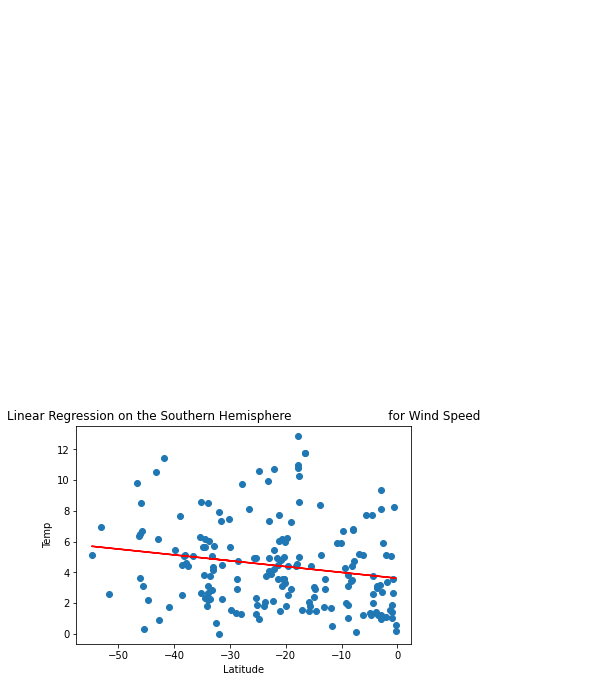

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))